
###
----------------

## <div align="center"> <span style="color:red;"> <strong>🛑Important🛑


<div align="center">Ce projet s'adresse à toutes les personnes ayant un minimum de connaissance sur le jeu League of Legends.

<div align="center">Pour bien comprendre les explications, il est conseillé de regarder cette courte vidéo avant de commencer la lecture du document : <a href="https://www.youtube.com/watch?v=SwlBTktgMM4" target="_blank">https://www.youtube.com/watch?v=SwlBTktgMM4</a>

#
----------------
###
###
###

# Présentation du projet 5B1C

iReaz est un créateur de contenu sur Youtube et Twitch spécialisé dans le jeu League of Legends (abrégé LoL) qui s'est un jour posé une question intéressante : "Est-ce qu'un joueur de niveau Challenger pourrait vaincre, à lui seul, 5 joueurs débutants dans une partie classique de LoL ?". Pour y répondre, il a organisé une série de vidéos intitulée "1 Challenger contre 5 Bronzes" où des groupes de 5 joueurs, classés Bronze (équivalent à un niveau débutant dans le jeu), ont affronté des joueurs Challenger (le rang des meilleurs joueurs) dans des parties classiques. Cette série de vidéos est disponible sur Youtube à l'adresse suivante : https://www.youtube.com/playlist?list=PLg9Rno9Ks-fPMNRjuxAt9YbFAL8--NEij.

Avant le lancement du défi, tout portait à croire que les Challengers gagneraient le défi relativement facilement, étant donné qu'il s'agit des meilleurs joueurs du jeu. Cependant, après de nombreuses vidéos, il est démontré que ce défi est en réalité très complexe et demande une précision de jeu quasi parfaite. Bien que débutants, les 5 joueurs, grâce à leur supériorité numérique, ont une plus grande facilité à dominer la carte, collecter des ressources et les utiliser contre le Challenger. Aussi, un combat à 1 contre 5 est très difficile à gagner sur LoL et il faut user de stratégies complexes pour parvenir à remporter ces combats.

5B1C (abréviation de 5 Bronzes 1 Challenger) est un projet qui vise à analyser les parties de LoL de cette série de vidéo pour en tirer des informations intéressantes permettant de faciliter la réussite de ce challenge. Plusieurs questions vont trouver une réponse ici, comme par exemple : 
- Quel est le nombre maximal de morts qu'un Challenger peut subir avant de rendre ce défi presque impossible à gagner ?
- Quel est le nombre optimal de creeps par minutes (CS/min) à farmer pour avoir une bonne entrée d'or tout au long de la partie ?
- Quelle est la meilleure stratégie pour atteindre le Nexus ennemi (la structure à détruire pour remporter la victoire) ?
Et autres.

Pour répondre à ces questions, deux catalogues ont été créés et contiennent 6 parties victorieuses et 11 perdantes (du point de vue du Challenger). 

Les résultats de l'analyse sont disponibles dans la partie conclusion, tout en bas de cette page.

## 1. Chargement des librairies et des catalogues

L'analyse commence dès maintenant par l'importation des librairies nécessaires pour réaliser divers calculs.

In [33]:
## Librairie externe à Python
import pandas as pd

## Librairie faite pour cette étude
import librarie as lib

## Paramètres d'affichage des catalogues
lib.display_parameters(pd)

Les deux catalogues vont être importés à savoir, celui contenant les 6 parties victorieuses et celui contenant les 11 parties perdantes.

In [34]:
## Importation des deux catalogues
victoire = pd.read_csv("donnees/victoire.csv")
defaite = pd.read_csv("donnees/defaite.csv")

## Transformer en liste Python les ensembles de données dans les colonnes des catalogues
list_columns = ["Temps numérique", "Temps numérique objets", "Kill", "Mort", "CS", "Temps objets", "Objets"]
victoire, defaite = lib.repair_df(victoire, defaite, list_columns)

Dans ces deux catalogues, de nombreuses colonnes sont disponibles et contiennent diverses informations sur les parties, à savoir :
- Le nom du Challenger réalisant le défi
- Son élo
- La durée de la partie
- Son KDA à la fin de la partie
- Le nombre de tours perdus (les tours sont des structures offensives défendant les voies, la base et le Nexus)
- Le nombre d'inhibiteurs perdus (les inhibiteurs sont des structures inoffensives situées à l'entrée des bases. Leur destruction par un joueur adversaire confère des avantages à son équipe.)
- Le nombre de tours détruites par le Challenger
- Le nombre d'inhibiteurs détruits par le Challenger
- Le CS/min à la fin de la partie
- Le nombre d'or total
- L'or/min moyen de la partie
- Le temps de la première mort du Challenger
- Le nombre de kills évoluant au fil de la partie (prélevé toutes les 2 minutes 30 du début jusqu'à la fin de la partie)
- Le nombre de morts évoluant au fil de la partie (prélevé toutes les 2 minutes 30 du début jusqu'à la fin de la partie)
- Le nombre de sbires évoluant au fil de la partie (prélevé toutes les 2 minutes 30 du début jusqu'à la fin de la partie)
- Le nombre de personnages avec des contrôles de foule (des sorts pouvant perturber les actions du Challenger)
- Le summoner 1	du Challenger
- Le summoner 2	du Challenger
- Les temps d'obtention des objets

Et d'autres colonnes pour faciliter les calculs et la conversion des temps en temps numérique utilisable par Python.

Pour exemple, ouvrons la première ligne du catalogue contenant les parties gagnantes :

In [35]:
## Voici à quoi ressemble les données dans le catalogue conternant les parties gagnantes :
victoire.head(1)

,Numéro,Nom du joueur,Elo,Champion,Durée de la partie,Vrai temps,KDA,Nombre de tours perdues,Nombre d'inibiteur perdus,Nombres de tours détruite,Nombre d'inibiteur détruit,Cs/min,Gold total,Gold/min,Temps première mort,Temps numérique première mort,Qui a eu la première mort ?,Temps,Temps numérique,Kill,Mort,CS,Gold/m,Nombre de perso à CC,Summoner 1,Summoner 2,Temps objets,Temps numérique objets,Objets,Hérald pris ?,Dragon,Source,Soul,CS_final
0,Game 1,Dark inugami,Challenger,Yasuo,00:20,20.216667,13.5,4,0,9,1,11.129431,22163,1096,00:06:51,6.85,1,"[00:00:00, 00:02:30, 00:05:00, 00:07:30, 00:10:00, 00:12:30, 00:15:00, 00:17:30, 00:20:00]","[0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5, 20]","[0, 0, 2, 3, 8, 10, 15, 19, 27]","[0, 0, 0, 1, 1, 2, 2, 2, 2]","[0, 12, 42, 66, 96, 134, 165, 201, 225]",1095,4,Flash,TP,"[00:03:35,00:09:10,00:12:12,00:13:59,00:16:19,00:19:18,00:19:18]","[3.58, 9.17, 12.2, 13.98, 16.32, 19.3, 19.3]","[Botte, 1er item, 2nd item, 3ème item, 4ème item, 5ème item, 6ème item]",?,0,https://www.youtube.com/watch?v=dBZy-SPi3SE&list=PL4aZl1fLxWKyT0hfBxslaiDuNVSZdNVUA&index=14,0,225


Maintenant que les catalogues sont importés, la comparaison entre les données peut commencer.

## 2. Début de l'analyse

De nombreuses informations vont être analysées. Pour commencer, il serait intéressant d'observer la différence d'or total moyen collecté entre les parties gagnantes et perdantes car l'or est une ressource clé dans le jeu pour pouvoir acheter des objets puissants et gagner en puissance. Perdre une partie signifie souvent ne pas avoir réussi à générer suffisamment d'or.

In [36]:
print("Or total moyen des parties victorieuses :", victoire["Gold total"].mean())
print("Or total moyen des parties perdantes :", defaite["Gold total"].mean())
print("Ecart d'or total moyen entre les parties victorieuses et perdantes :", victoire["Gold total"].mean() - defaite["Gold total"].mean())

Or total moyen des parties victorieuses : 22049.5
Or total moyen des parties perdantes : 13952.25
Ecart d'or total moyen entre les parties victorieuses et perdantes : 8097.25


Il est possible de constater un écart gigantesque d'environ 8100 pièces d'or. Etudier cet écart et le comprendre pourrait permettre de développer des stratégies pour l'atténuer et donc augmenter l'apport en or durant une partie. Aussi, il est possible de comparer l'or par minute moyen entre les parties gagnantes et perdantes.

In [37]:
print("Or/min moyen des parties victorieuses :", victoire["Gold/min"].mean())
print("Or/min moyen des parties perdantes :", defaite["Gold/min"].mean())
print("Ecart d'or/min moyen entre les parties victorieuses et perdantes :", victoire["Gold/min"].mean() - defaite["Gold/min"].mean())

Or/min moyen des parties victorieuses : 962.5
Or/min moyen des parties perdantes : 571.875
Ecart d'or/min moyen entre les parties victorieuses et perdantes : 390.625


Il est donc aussi possible de constater que l'or par minute des parties gagnantes est très clairement au-dessus de celui des parties perdantes d'environ 390 or/min, ce qui constitue une différence énorme dans LoL.

Essayons de comprendre cet écart en étudiant tous les moyens possibles d'obtenir de l'or dans le jeu, à savoir en tuant des ennemis, des sbires ou en détruisant des structures adversaires.

### 2.1 Évolution de l'obtention des kills au cours des parties

Commençons par comparer l'évolution des kills obtenus dans toutes les parties (victorieuses et perdantes). Pour faciliter l'observation des résultats, toutes les parties victorieuses vont être situées dans une zone en verte et toutes les parties perdantes, dans une zone en rouge. Les moyennes du nombre de kills des parties vont aussi être affichées.

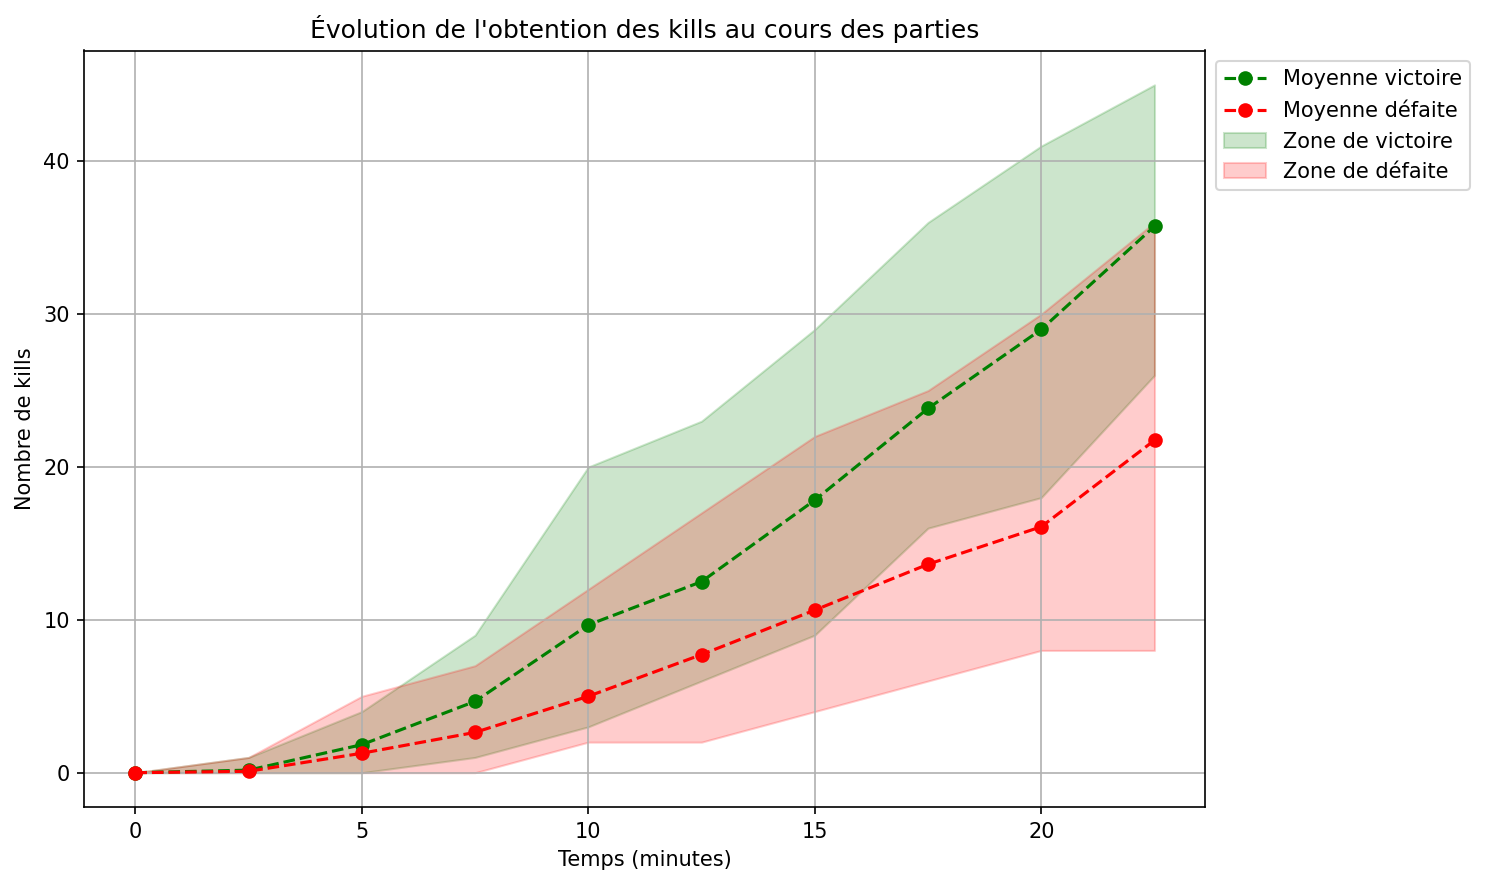

In [38]:
_,_ = lib.plot_colonnes(victoire, defaite, "Temps numérique", "Kill", 'Nombre de kills', 'Évolution de l\'obtention des kills au cours des parties', remove_column_with_one_value_bool =True, plot_games = False)

Plusieurs informations peuvent être extraites :
- Tout d'abord, il est possible de constater que, dans les parties gagnantes, le nombre de kills moyen par minute est toujours plus élevé que dans les parties perdantes. Pour avoir un revenu intéressant d'or, il faut donc tuer un maximum d'ennemis étant donné que cela apporte une quantité d'or importante (environ 300 pièces d'or par kill). Ceci peut expliquer en grande partie la différence d'or/min moyen des parties gagnantes et perdantes vue précédemment.
- Pour maximiser ses chances de réussir ce défi, il faudrait avoir un nombre de kill moyen égal à celui de la moyenne des parties gagnantes. Cela signifie qu'il faut avoir environ 2 kills vers 5 minutes de jeu, 10 kills vers 10 minutes de jeu, 18 kills vers 15 minutes de jeu et 29 kills vers 20 minutes de jeu. Cela devrait permettre d'obtenir un apport en or suffisamment intéressant pour pouvoir réussir le défi.
- Vers 5 minutes de jeu, il est possible de constater une moyenne de 1.8 kill. Stratégiquement, pour réussir à les obtenir, il serait intéressant de se diriger vers la botlane et d'essayer de tuer le duo d'adversaire en face.

### 2.2 Évolution des CS (creep score = nombre de sbires tués) au cours des parties

Observons maintenant l'évolution des CS obtenus dans toutes les parties (victorieuses et perdantes) ainsi que le CS/min moyen.

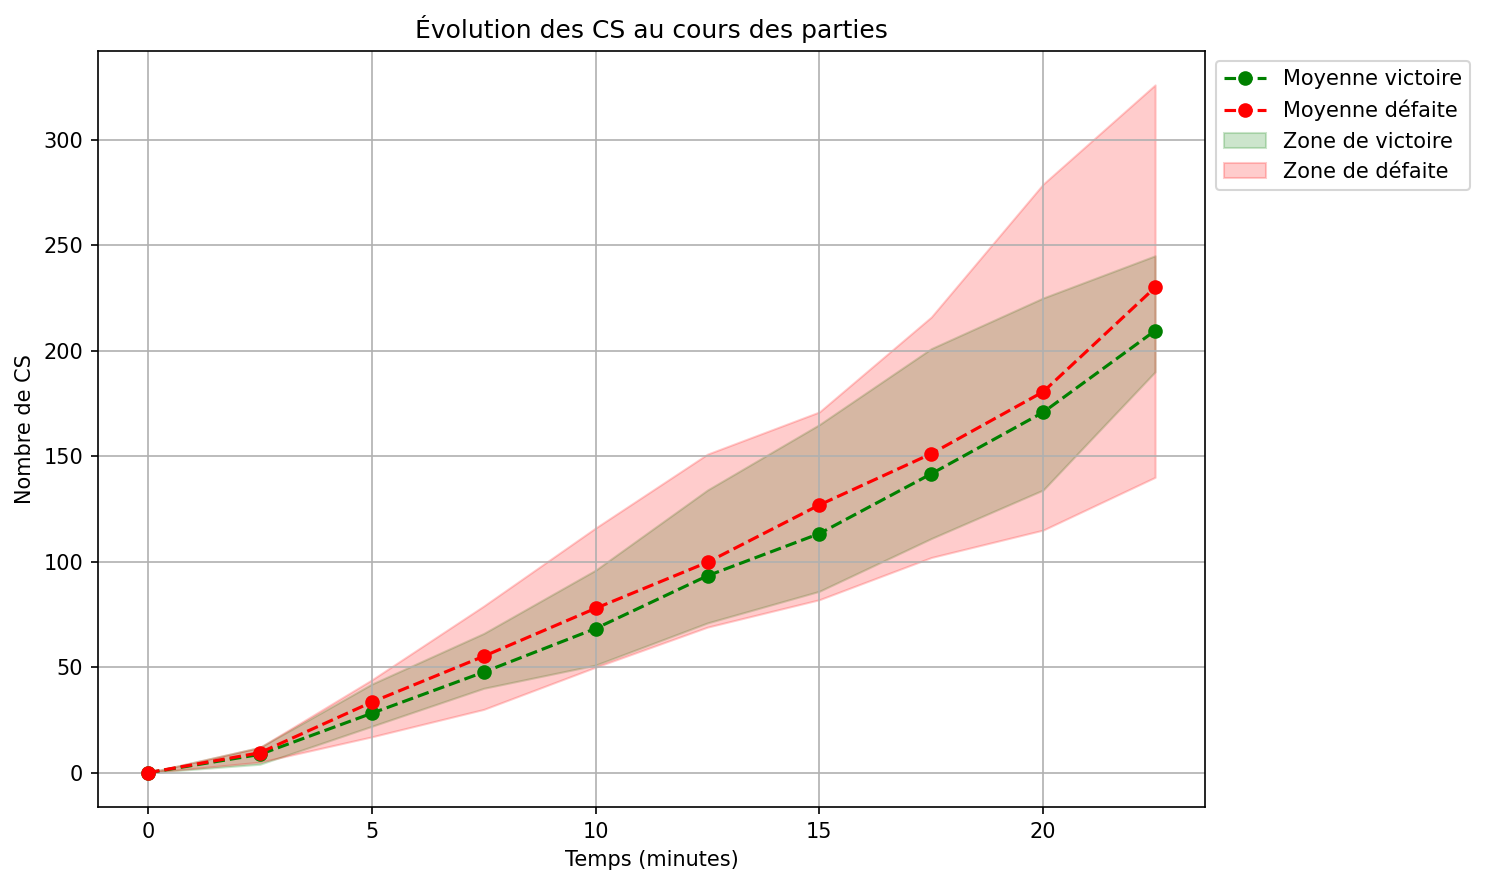

In [39]:
victoire_df, defaite_df = lib.plot_colonnes(victoire, defaite, "Temps numérique", "CS", 'Nombre de CS', 'Évolution des CS au cours des parties', remove_column_with_one_value_bool =True, plot_games = False)

In [40]:
print("CS/min moyen des parties victorieuses :", lib.cs_min(victoire_df))
print("CS/min moyen des parties perdantes :", lib.cs_min(defaite_df))
print("Ecart de CS/min moyen entre les parties victorieuses et perdantes :", lib.cs_min(defaite_df) - lib.cs_min(victoire_df))

CS/min moyen des parties victorieuses : 7.02879188712522
CS/min moyen des parties perdantes : 7.772050665383997
Ecart de CS/min moyen entre les parties victorieuses et perdantes : 0.7432587782587765


Plusieurs informations peuvent être extraites de la figure et de l'écart de CS/min moyen entre les parties :
- Il est possible de constater sur la figure que la moyenne du nombre de CS des parties gagnantes et perdantes est très proche bien que celle des parties gagnantes semble légèrement inférieure. Il est possible d'en déduire que farmer des creeps est important, mais ne semble pas être une condition majeure pour réussir le défi étant donné que la moyenne des parties perdantes est supérieure aux parties gagnantes. Cela signifie qu'il est plus intéressant de se concentrer sur la collecte d'or par d'autres moyens (tuer des joueurs ou détruire des structures) que farmer.
- Le faible écart d'environ 0.74 CS/min entre les deux moyennes de CS/min des parties gagnantes et perdantes confirme que farmer n'est pas une condition de victoire majeure. Il est important et nécessaire de farmer correctement pour avoir un revenu en or intéressant mais il est préférable de se concentrer sur d'autres sources de revenu.
- En moyenne, pour avoir un revenu intéressant en or avec le farming et augmenter ses chances de réussir le défi, il faut tuer environ 7 sbires par minute.

Maintenant, étudions une autre façon d'obtenir de l'or : détruire des structures adversaires

### 2.3 Destruction des tourelles par le Challenger

Deux types de structures peuvent être détruites pour apporter de l'or dans le jeu aux joueurs à savoir les tourelles (abrégées en tours) et les inhibiteurs. Commençons par comparer le nombre de tours détruites par le Challenger dans les deux types de parties :

In [41]:
print("Nombre de tours détruites moyens par le Challenger des parties victorieuses :", victoire["Nombres de tours détruite"].mean())
print("Nombre de tours détruites moyens par le Challenger des parties perdantes :", defaite["Nombres de tours détruite"].mean())
print("Ecart de tours détruite moyen par le Challenger entre les parties victorieuses et perdantes :", victoire["Nombres de tours détruite"].mean() - defaite["Nombres de tours détruite"].mean())

Nombre de tours détruites moyens par le Challenger des parties victorieuses : 6.5
Nombre de tours détruites moyens par le Challenger des parties perdantes : 1.0909090909090908
Ecart de tours détruite moyen par le Challenger entre les parties victorieuses et perdantes : 5.409090909090909


Plusieurs informations peuvent être extraites de ces données :
- Tout d'abord, il est possible de constater un grand écart entre le nombre de tours détruits pour les parties gagnantes et perdantes. Ceci aide à expliquer la différence d'or/min moyen entre les parties gagnantes et perdantes.
- Il semblerait que pour mener à bien le défi, il faut détruire environ 6 à 7 tours. Or, pour atteindre le Nexus ennemi en passant par une voie, il faut détruire minimum 5 tours. Cela signifie qu'il est préférable stratégiquement de se concentrer sur la destruction d'une seule voie et de seulement détruire les premières tours des autres voies pour maximiser l'apport en or.
- Une stratégie qui pourrait être intéressante à développer pour maximiser son apport en or est de se concentrer sur la destruction des 3 premières tours sur la carte pour, à la fois, récupérer des plates (des protections mises sur les tours avant 14 minutes de jeu apportant une bonne quantité d'or lors de leur destruction) mais aussi tenter de détruire une de ces tours. Passé 14 minutes, les plates disparaissent et c'est à ce moment-là qu'il faut se concentrer sur la destruction de toutes les structures d'une seule voie pour parvenir au Nexus adversaire le plus rapidement possible avant que les adversaires ne soient trop forts.
- La voie du bas semble être le meilleur choix à attaquer dès le début du jeu. La tour de cette voie n'est pas équipée de la réduction contre les dégâts au début du jeu ce qui facilite la destruction de cette structure dès les premières minutes de jeu.
- Etant donné que la destruction des tours est une condition très importante pour réussir le défi, il faut donc jouer un personnage qui a la capacité de détruire rapidement des tours. Il est donc conseillé de jouer des personnages bruiser, avec la capacité de détruire très rapidement des structures (split push) ou des personnages avec des objets de bruiser.

### 2.4 Destruction des inhibiteurs par le Challenger

Observons maintenant les résultats obtenus avec la destruction des inhibiteurs.

In [42]:
print("Nombre d'inhibiteurs détruits moyen des parties victorieuses :", victoire["Nombre d'inibiteur détruit"].mean())
print("Nombre d'inhibiteurs détruits moyen des parties perdantes :", defaite["Nombre d'inibiteur détruit"].mean())

Nombre d'inhibiteurs détruits moyen des parties victorieuses : 1.0
Nombre d'inhibiteurs détruits moyen des parties perdantes : 0.2727272727272727


Le résultat obtenu va dans le sens des explications précédentes. Cela souligne le fait qu'il vaut mieux se concentrer sur la destruction d'une seule voie et donc détruire un seul inhibiteur pour atteindre le Nexus.

### 2.5 Observation des temps d'obtention des objets au cours des parties

Maintenant que nous avons vu les différents moyens pour obtenir de l'or, il est possible de se demander, à quoi va servir cet or ? Dans LoL, il est possible de gagner des statistiques en montant de niveau, mais aussi en achetant des objets à la boutique. Ces objets constituent la clé pour gagner ce défi. Plus un objet est acheté tôt dans le jeu, plus le champion du Challenger va devenir puissant et plus le défi va devenir réalisable. Comparons le temps moyen d'arrivée des objets entre les parties gagnantes et perdantes.

[3.58, 9.17, 12.2, 13.98, 16.32, 19.3, 19.3]
[13.12, 11.3, 16.93, 18.58, 20.73, 22.17]
[4.83, 9.7, 15.9]
[16.28, 7.82, 10.9, 13.9, 18.95, 21.62]
[3.58, 9.17, 12.2, 13.98, 16.32, 19.3, 19.3]
[13.12, 11.3, 16.93, 18.58, 20.73, 22.17]
[4.83, 9.7, 15.9]
[16.28, 7.82, 10.9, 13.9, 18.95, 21.62]


ValueError: operands could not be broadcast together with shapes (6,) (2,) 

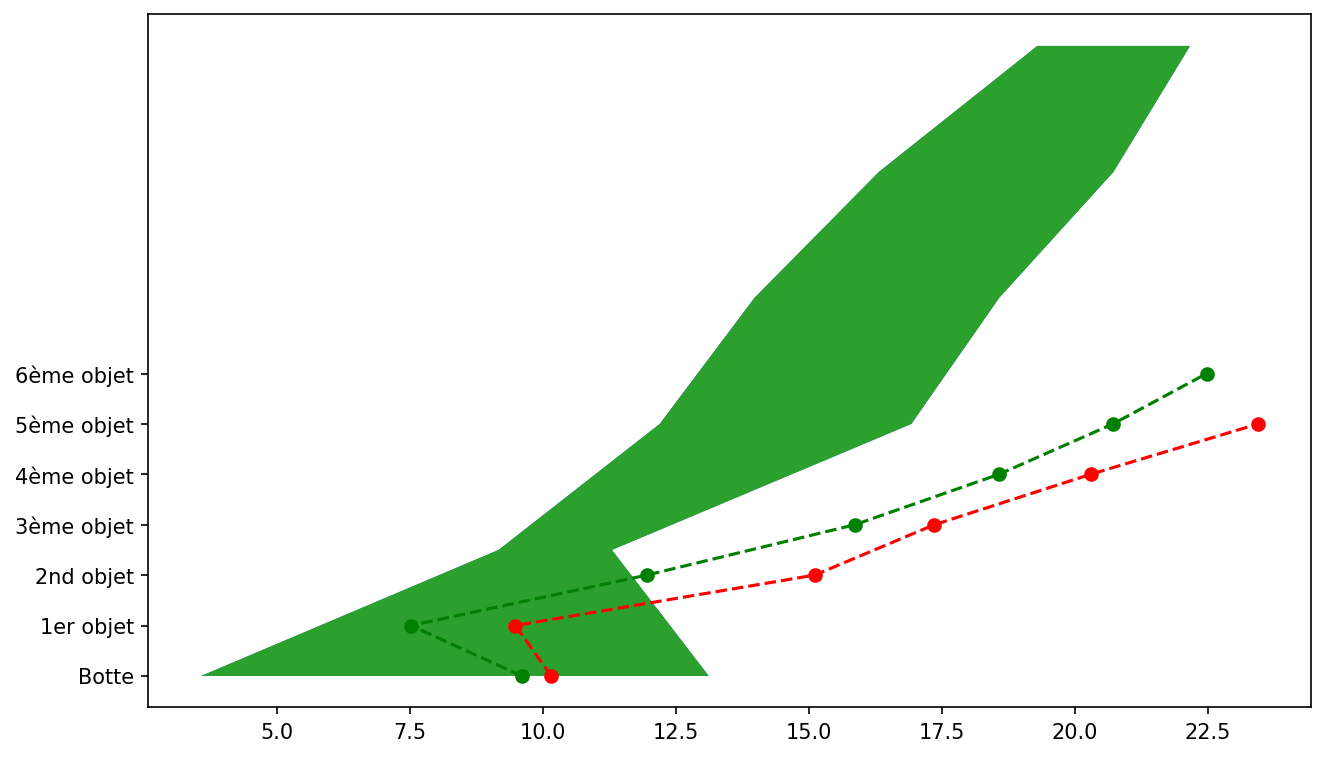

In [50]:
df_with_mean_y_vict = lib.plot_colonnes(victoire, defaite, "Temps numérique objets", "Objets", 'Nombre d\'objets', 'Temps d\'obtention des objets au cours des parties', remove_column_with_one_value_bool = False, plot_games = False,  plot_xlim = True)

In [45]:
victoire["Temps numérique objets"]

0       [3.58, 9.17, 12.2, 13.98, 16.32, 19.3, 19.3]
1             [10.0, 6.0, 10.0, 14.75, 15.58, 17.33]
2            [9.82, 5.92, 9.82, 13.43, 17.17, 20.93]
3    [12.12, 7.33, 10.95, 16.3, 18.58, 20.83, 22.68]
4          [13.12, 11.3, 16.93, 18.58, 20.73, 22.17]
5     [8.98, 5.4, 11.83, 18.17, 23.08, 23.77, 25.47]
Name: Temps numérique objets, dtype: object

In [46]:
max_par_colonne = victoire["Temps numérique objets"].max(skipna=True)
min_par_colonne = victoire["Temps numérique objets"].min(skipna=True)
        

In [47]:
max_par_colonne

[13.12, 11.3, 16.93, 18.58, 20.73, 22.17]

In [ ]:
min_par_colonne

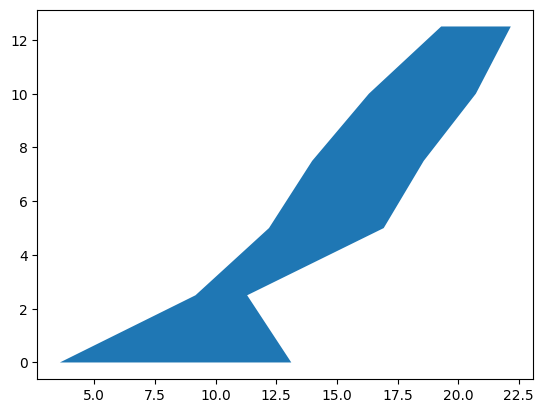

In [48]:
import ast

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings


espace = np.arange(0, len(max_par_colonne) * 2.5, 2.5)
plt.fill_betweenx(espace, min_par_colonne[:-1], max_par_colonne)

Plusieurs informations peuvent être extraites de cette figure :
- Tout d'abord, la moyenne de temps d'obtention des objets est très nettement supérieure du côté des parties gagnantes que perdantes, ce qui était attendu en observant l'or total acquis entre les deux types de parties.
- Pour réussir le défi, d'après la moyenne des temps d'obtention des objets des parties gagnantes, il faut réussir à acheter son 1er objet vers 8 minutes de jeu, son 2nd vers 12 minutes, son 3ème vers 16 minutes, son 4ème vers 18 minutes 30, son 5ème vers 21 minutes et son dernier vers 22 minutes 30. Les bottes doivent être complétées vers 10 minutes de jeu.
- Il semble préférable d'acheter tout d'abord son 1er objet plutôt que de compléter ses bottes.
- Parvenir à l'achat d'un 6ème objet semble aider à réussir le défi. Il est donc plutôt conseillé de vendre ces bottes et d'acheter un objet à la place, si possible.

Cette figure montre l'importance d'acquérir de l'or rapidement en début de partie. Il faut donc prendre des risques assez tôt dans la partie pour pouvoir acquérir de l'or rapidement. Parlons justement des risques à prendre pour réussir ce défi et des limites à ne pas dépasser sous peine d'échec.

### 2.6 Les risques à prendre et à ne pas prendre

Commençons par observer l'évolution du nombre de morts des Challengers dans les parties gagnantes et perdantes :

In [ ]:
df_with_mean_y_vict_4 = lib.plot_colonnes(victoire, defaite, "Temps numérique", "Mort", 'Nombre de morts', 'Évolution du nombre de morts des Challengers au cours des parties', plot_games = False)

Plusieurs informations peuvent être extraites de cette figure : 
- Tout d'abord, il est possible de constater que les moyennes se croisent. Entre 2 minutes 30 et 7 minutes 30, la moyenne du nombre de morts des parties gagnantes est supérieure à celle des parties perdantes. Ceci s'inverse ensuite et il est possible de constater que la moyenne des parties perdantes devient très nettement supérieure à celle des parties gagnantes. Ceci peut s'expliquer par le fait qu'il est intéressant de prendre des risques dès le début de la partie (avant 7 minutes 30 de jeu) pour tenter d'obtenir des kills ou commencer à détruire des structures pour acquérir de l'or. Si cette prise de risque finit par la mort du Challenger, le défi n'est pas échoué car au début d'une partie, le chronomètre de réapparition des joueurs n'est pas très long et les joueurs débutants n'ont pas encore la capacité de détruire des tours rapidement pour accéder à la base du Challenger. Prendre des risques est conseillé au début d'une partie pour acquérir de l'or rapidement et il est possible de mourir au moins une fois avant 10 minutes de jeu sans entraîner l'échec du défi.
- En avançant dans la partie, il est possible de mourir une seconde fois vers 15 minutes de jeu et de toujours réussir le défi. Cependant, plusieurs conditions s'imposent pour que cette mort ne soit pas trop pénalisante à savoir : cette mort doit être accompagnée d'une grande collecte d'or (destruction d'une tourelle ou plusieurs kills), les tourelles alliées ne doivent pas être toutes détruites et il ne doit pas rester trop de joueurs ennemis vivants pour qu'ils ne puissent pas détruire toutes les structures ou finir la partie. Aussi, il est important de noter qu'il est très important que les morts du Challenger soient bien espacés dans le temps car, trop proche, cela entraînerait une trop longue absence d'entrée d'or et pourrait créer un retard irrécupérable.
- Il est éventuellement possible de mourir une troisième fois passé 17 minutes 30. Si les conditions évoquées précédemment sont aussi respectées et que le Challenger possède une grande avance sur les ennemis, cela ne devrait pas entraîner un échec du défi.
- En regardant la moyenne de l'évolution des morts pour les parties perdantes, il est possible de constater que mourir 5 fois ou plus rend le défi impossible à remporter.
- Globalement, il vaut mieux éviter de mourir même s'il est possible de faire des erreurs si elles s'accompagnent d'une grande entrée en or.

D'autres données peuvent aussi être observées, à savoir le KDA (K = Kills, D = Deaths, A = Assists). Le KDA (ou juste KD dans le cas de cette analyse étant donné que les Challengers ne peuvent pas avoir d'assistances) moyen des parties victorieuses et perdantes permet de valider les explications précédentes.

In [ ]:
print("KD moyen des parties victorieuses :", victoire["KDA"].mean())
print("KD moyen des parties perdantes :", defaite["KDA"].mean())
print("Ecart du KD moyen entre les parties victorieuses et perdantes :", victoire["KDA"].mean() - defaite["KDA"].mean())

La différence de KD entre les deux types de partie est d'environ 13. Cette différence est énorme et appuie bien le fait qu'il ne faut pas trop mourir pour réussir ce défi. Il faut aussi tuer beaucoup de joueurs adversaires pour pouvoir obtenir suffisamment d'or pour acheter des objets rapidement et gagner en puissance.

Pour accentuer l'analyse sur les risques à prendre pour réussir le défi, observons le temps moyen de la première mort du Challenger entre les parties gagnantes et perdantes.

In [ ]:
print("Le temps moyen de la première mort du Challenger dans les parties victorieuses :", victoire["Temps numérique première mort"].mean())
print("Le temps moyen de la première mort du Challenger dans les parties perdantes :", defaite["Temps numérique première mort"].mean())
print("Ecart du temps moyen de la première mort du Challenger entre les parties victorieuses et perdantes :", defaite["Temps numérique première mort"].mean() - victoire["Temps numérique première mort"].mean())

Il est possible de constater que les Challengers meurent plus tôt dans les parties gagnantes que perdantes. Ceci est une information intéressante et démontre que prendre des risques tôt dans une partie est intéressant pour pouvoir générer beaucoup d'or tôt dans la partie. Il est donc conseillé de prendre des risques quitte à mourir pour acquérir de l'or rapidement.

### 2.7 Les conditions de défaite

Ensuite, il est possible de discuter des conditions de défaite du défi. Nous avons vu précédemment qu'un trop grand nombre de morts peut entraîner un échec. Cependant, il est important de savoir qu'une trop grande destruction de structures alliées peut aussi entraîner un échec du défi. Voyons cela en comparant le nombre moyen de structures perdues des deux types de parties.

In [ ]:
print("Nombre de tours perdues moyen des parties victorieuses :", victoire["Nombre de tours perdues"].mean())
print("Nombre de tours perdues moyen des parties perdantes :", defaite["Nombre de tours perdues"].mean())
print("Ecart du nombre moyen de tours perdues entre les parties victorieuses et perdantes :", defaite["Nombre de tours perdues"].mean() - victoire["Nombre de tours perdues"].mean())

Dans ce défi, il est très difficile voire impossible de protéger toutes les tours seul. Il est donc obligatoire d'en perdre quelques-unes. Cela n'entraîne pas un échec du défi. Il faut cependant faire attention à ne pas en perdre trop. D'après les résultats, il est possible d'en perdre environ 7 et de réussir tout de même le défi. Cependant, en perdre 10 semble entraîner un échec du défi. Pour mieux comprendre pourquoi, regardons le nombre moyen d'inhibiteurs perdus dans les parties gagnantes et perdantes.

In [ ]:
print("Nombre d'inhibiteur perdus moyen des parties victorieuses :", victoire["Nombre d'inibiteur perdus"].mean())
print("Nombre d'inhibiteur perdus moyen des parties perdantes :", defaite["Nombre d'inibiteur perdus"].mean())
print("Ecart du nombre moyen d'inibiteur perdues entre les parties victorieuses et perdantes :", defaite["Nombre d'inibiteur perdus"].mean() - victoire["Nombre d'inibiteur perdus"].mean())

Du côté des inhibiteurs, il est possible d'en perdre un seul et de toujours réussir le défi. Cependant, en perdre 2 ou plus semble rendre le défi trop compliqué à réussir. En effet, il est beaucoup plus facile de gérer la perte d'un seul inhibiteur que de deux. Lorsqu'un inhibiteur est détruit, la base est attaquée par des sbires plus puissants (appelé méga-sbires). Il est donc plus compliqué de défendre la base. L'arrivée des méga-sbires peut compliquer grandement la réussite du challenge si la base est attaquée sur plusieurs voies. Perdre des tours ne semble pas être trop pénalisant mais il faut néanmoins protéger au maximum les inhibiteurs qui peuvent être une condition d'échec du défi s'ils sont détruits.

### 2.8 La durée des parties

Enfin, il est possible de comparer la durée moyenne des parties gagnantes ou perdantes.

In [ ]:
print("Durée moyenne des parties victorieuses :", victoire["Vrai temps"].mean())
print("Durée moyenne des parties perdantes :", defaite["Vrai temps"].mean())

Il est possible de constater une faible différence entre les deux durées moyennes des parties. Les parties perdantes semblent être un peu plus longues, ce qui peut s'expliquer par le fait où les forces des deux équipes sont égales pendant une longue durée puis finissent par pencher du côté des joueurs débutants. Pour réussir le défi, il faut donc réussir à terminer la partie avant 23 minutes, sinon l'avantage créé par le Challenger risque d'être rattrapé petit à petit par les débutants. Le défi va alors se compliquer et devenir quasi impossible.

## 3. Conclusion

L'analyse est terminée. Il est temps de réunir tous les résultats et de tirer des conclusions permettant d'aider à la réussite de ce défi. Avant de commencer, je tiens tout de même à souligner de nouveau que ce challenge est, selon mon avis et les résultats de cette analyse, très difficile et demande des connaissances de jeu très poussées. Il faut avoir une très bonne connaissance de son champion (de ses mécaniques et de ses limites), avoir une bonne connaissance des capacités et des possibilités des champions ennemis et une bonne connaissance du jeu et de la carte de LoL. Faire une ou plusieurs erreurs dans ce défi peut entraîner un échec immédiat. Il est donc essentiel d'avoir déjà beaucoup d'expérience dans le jeu pour maximiser ses chances de réussite. Je ne dis pas que ce challenge est impossible pour les joueurs amateurs, mais il est conseillé de préparer une ou plusieurs stratégies si les connaissances du jeu ne sont pas optimales.

Avant de passer aux conclusions, je tiens à dire que cette analyse s'effectue sur un nombre réduit de parties et que pour avoir des résultats solides, il faudrait avoir un échantillon de 50 à 100 parties. Cependant, il est important de savoir que peu de personnes ont remporté ce défi (donc l'échantillon des parties victorieuses est faible). Néanmoins, les résultats obtenus dans cette analyse sont intéressants mais ils doivent être pris avec des pincettes.

**Voici les conclusions de cette analyse :**

- Pour réussir le défi, il faut générer environ 950 or par minute. Plusieurs moyens sont possibles pour parvenir à générer autant d'or. Certains moyens doivent être plus appuyés que d'autres notamment tuer des joueurs ou détruire des structures (plates et tours). 
- Pour générer beaucoup d'or en tuant des joueurs, il faut essayer d'avoir 2 kills vers 5 minutes de jeu, 10 kills vers 10 minutes de jeu, 18 kills vers 15 minutes de jeu et 29 kills vers 20 minutes de jeu.
- Détruire 6 à 7 tours et 1 inhibiteur permet de réussir le défi. Il n'est pas nécessaire de détruire davantage de structures car il est préférable de se concentrer sur la destruction sur une seule voie.
- Farmer est important et il faut tuer en moyenne 7 sbires par minute. Il ne faut pas trop se concentrer sur ce moyen pour générer de l'or mais plutôt sur l'obtention de kills ou la destruction de structures.
- Il est préférable de commencer par acheter un objet plutôt que compléter ces bottes.
- Il faut réussir à acheter son 1er item vers 8 minutes de jeu, son 2nd vers 12 minutes, son 3ème vers 16 minutes, son 4ème vers 18 minutes 30, son 5ème vers 21 minutes et son dernier vers 22 minutes 30. Les bottes doivent être complétées vers 10 minutes de jeu.
- Parvenir à l'achat d'un 6ème item semble aider à réussir le défi. Il est donc conseillé de vendre ces bottes et d'acheter un objet, si possible.
- Il est possible de mourir 3 fois avec de grands intervalles de temps et de réussir le défi.
- Il est conseillé de prendre des risques en début de partie, quitte à mourir, pour commencer à générer beaucoup d'or.
- Mourir 5 fois rend le défi quasi impossible donc il faut absolument éviter de mourir autant.
- Perdre 1 inhibiteur n'est pas grave et n'entraîne pas forcément un échec du défi. En perdre 2 augmente grandement les chances de perdre. En perdre 3 rend le défi quasi impossible.
- Une partie doit durer le moins de temps possible et finir de préférence avant 23 minutes. 

**Voici mes conclusions personnelles qui ne sont pas issues de cette analyse :**

- Il n'est pas recommandé de se concentrer sur les objectifs suivants : dragons, baron ou grubs.
- Il est préférable de jouer plutôt des champions bruiser qui ont une capacité à détruire des tours rapidement.


**Stratégie de jeu :**

Voici une stratégie qui, selon moi, permettrait de maximiser les chances de victoire. Tout d'abord, après l'achat des items de départ, il est conseillé de commencer par farmer sur le voie du milieu étant donné que c'est ici ou les sbires arrivent le plus vite. Je ne conseille pas de prendre de risque car parfois, les joueurs débutants peuvent s'amuser à tendre un piège et venir à 5 au milieu de la carte pour tuer le Challenger. Après quelques vagues de sbires et après, si possible, avoir mis le joueur du milieu dans une position peu favorable (c'est-à-dire, le tuer ou mettre au moins tous ses sbires sous sa tour), il est conseillé de se diriger vers la voie du bas. C'est à ce moment-là qu'il faut prendre des risques pour essayer de tuer les deux joueurs d'en face et commencer à récupérer de l'or, quitte à mourir. Ensuite, de mon point de vue, il est intéressant de se diriger un peu sur toutes les voies, pour éviter que les adversaires détruisent trop vite les structures mais aussi pour tenter de récupérer des kills, tuer beaucoup de sbires mais aussi de tenter de récupérer des plates et des tours. Après 14 minutes de jeu, je pense qu'il est préférable de se concentrer sur la destruction des structures d'une seule voie. La voie du bas semble être le meilleur choix, étant donné que les adversaires sont deux à défendre cette voie. Cela permet de récupérer plus de kills (avec possiblement la venue du jungler) et de réduire la venue du toplaner (donc d'éviter des situations de 1 contre 4 ou 5). Bien sûr, il faut aussi, de temps en temps, aller défendre les autres voies pour éviter que les adversaires obtiennent des structures alliées trop tôt. Une stratégie intéressante à développer serait que, lors des retours à la base, il faut choisir une voie à protéger, la défendre au maximum puis retourner sur la voie du bas avec une téléportation et continuer la destruction des structures de cette voie.



L'analyse est terminée, je vous remercie pour votre lecture. Je tiens à préciser que ceci est mon analyse personnelle des résultats. Elle peut contenir des erreurs, des imprécisions, des imperfections et vous pouvez aussi être totalement en désaccord avec ce que je dis. Si vous souhaitez en discuter, vous pouvez toujours me contacter sur Discord (mon nom d'utilisateur : thibot ; mon ID : 227126730567974912). Mon niveau est Emeraude sur LoL. Cette analyse a été validée par un joueur Diamant et Bronze.

**Perspectives de l'analyse :**

Les pistes à suivre pour améliorer cette analyse sont les suivantes : 
- Compter les plates obtenus et voir si un nombre élevé influence le fil d'une partie.
- Voir si un nombre trop élevé d'adversaires avec des contrôles de foule influence la partie.
- Comparer les summoners avec les parties gagnantes ou perdantes et voir si par exemple, une TP mène plus souvent à une victoire. 
Et autres...